# **Discrete Uniform Distributions**
Definition: A random variable X has a discrete uniform distribution if each of the n values in its range: $$x_{1},x_{2},x_{3}....x_{n}$$ has equal probability: 

$$ f(x_{i}) = 1/n $$

Now let's use python to show a simple example!

## 1. imports:

In [10]:
# Import all the usual imports from the Python for Data Analysis and Visualization Course.
from __future__ import division
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Set up a dice roll and plot the distribution using seaborn.

[Text(0, 0.5, 'Probability'),
 Text(0.5, 0, 'Roll options'),
 Text(0.5, 1.0, 'Probability Mass Function for Dice Roll')]

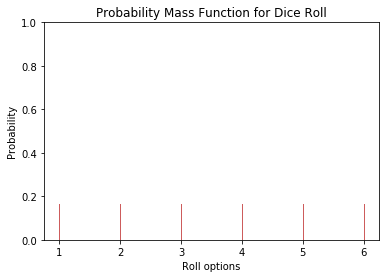

In [11]:
# How about a roll of a dice?

# Let's check out the Probability Mass function!

# Each number
roll_options = [1,2,3,4,5,6]

# Total probability space
p_total = 1

# Each roll has same odds of appearing (on a fair die at least)
p_roll = p_total / len(roll_options)

# Plot using seaborn rugplot (note this is not really a rugplot), setting height equal to probability of roll
uni_plot = sns.rugplot(roll_options,height=p_roll,c='indianred')

# Set Title
uni_plot.set(xlabel='Roll options', ylabel='Probability', title='Probability Mass Function for Dice Roll')


We can see in the above example that the ``f(x)`` value on the plot is just equal to 1/(Total Possible Outcomes)

## 3. what's the mean $\mu$ and variance $\sigma^2$ of this uniform distribution? 

The mean is simply the max and min value divided by two, just like the mean of two numbers.

$$ \mu = (b+a)/2 $$

With a variance of:

$$ \sigma^2=\frac{(b-a+1)^2 - 1 }{12}$$

--------

## Now let's see how to automatically create a Discrete Uniform Distribution using Scipy.

In [14]:
# Imports
from scipy.stats import randint

#Set up a low and high boundary for dice roll ( go to 7 since index starts at 0)
low,high = 1,7

# Get mean and variance
mean,var = randint.stats(low,high)

print('The mean is %2.1f' %mean)
print("The variance is %2.1f" %var)


The mean is 3.5
The variance is 2.9


<BarContainer object of 6 artists>

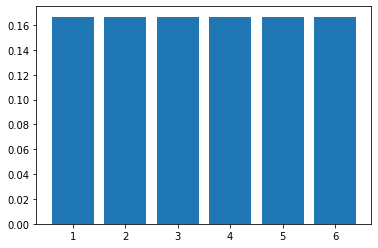

In [15]:
# Now we can make a simple bar plot
plt.bar(roll_options,randint.pmf(roll_options,low,high))

---------------------------------------------

## Example of real world use: German Tank Problem

We will use the uniform distribution function to solve the famous German Tank Problem.

For background, first read the wikipedia page: http://en.wikipedia.org/wiki/German_tank_problem

Excerpt from Wikipedia:
"In the statistical theory of estimation, the problem of estimating the maximum of a discrete uniform distribution from sampling without replacement is known in English as the German tank problem, due to its application in World War II to the estimation of the number of German tanks. Estimating the population maximum based on a single sample yields divergent results, while the estimation based on multiple samples is an instructive practical estimation question whose answer is simple but not obvious."

After reading the Wikipedia article, check out the following code for an example Python workout of the example problem.

### Using a Minimum-variance unbiased estimator we obtain the population max is equal to :

$$ Population_\max = sample_\max +  \frac{sample_\max}{sample_{size}} -1 $$

If we for instance captured 5 ($sample_{size}$) tanks with the serial numbers 3,7,11,16 then we know the max observed serial number was $sample_\max = 16$.

This is our sample max with a sample size of 5 tanks. Plugging into the MVUE results in:


In [17]:
total_tank_estimate = 16 + (16/5) - 1
total_tank_estimate

18.2

### For a Bayseian Approach:

In [19]:
m=16
k=5
tank_b_estimate = (m-1)*( (k-1)/ ( k-2) )
tank_b_estimate

20.0

Remember, this is still missing the STD